In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x,y = mnist['data'], mnist['target']


In [3]:
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

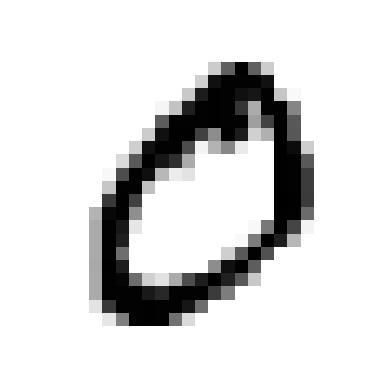

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x.to_numpy()[1]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [13]:
y.to_numpy()[1]

0

In [14]:
import numpy as np
y = y.astype(np.uint8)

In [15]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [18]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [19]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_0) # x_train = training data, y_train_0 = training data label

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

C:\Users\arpan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [23]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.base import  clone

skfolds = StratifiedGroupKFold(n_splits=3)

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(x_train, y_train_0):
    clone_clf = clone(sgd_clf)
    X_train_folds = x_train.values[train_index]
    y_train_folds = y_train_0[train_index]
    X_test_fold = x_train.values[test_index]
    y_test_fold = y_train_0[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9878
0.98735
0.98775


In [33]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_0, cv=3)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[53486,   591],
       [  277,  5646]], dtype=int64)